<a href="https://colab.research.google.com/github/kim-daehyun/study_trace/blob/Computer-Statistics/12_Two_proportion_z_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy import stats
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

# Example

In [2]:
# Here are two sample proportions with a size of 300 for each.

sample1_prop = 0.34
sample2_prop = 0.38

# Let's check the significance of the difference by the two-proportion z-test.

# Step 1. Define null and alternative hypotheses

In [3]:
# H0 : p_sample1 = p_sample2
print("H0: The two samples are from the same population.")

# H1 : p_sample1 != p_sample2 
print("H1: The two samples are significantly different.")

H0: The two samples are from the same population.
H1: The two samples are significantly different.


# Step 2. Calculate a test statistic

In [4]:
# z = sample_error / std_error

# Sample error = (SampleProp1 - SampleProp2) - (mu1 - mu2)
sample_error = sample1_prop - sample2_prop - 0

# Standard error of the mean difference
#  = sqrt( pooled_prop * (1 - pooled_prop)) * np.sqrt( 1/n1 + 1/n2)

# Poopled proportion = (freq1 + freq2) /(n1 + n2)
pooled_prop = (200*sample1_prop + 200*sample2_prop) / (200 + 200)
standard_error = np.sqrt( pooled_prop * (1 - pooled_prop)) * np.sqrt( 1/200 + 1/200)

z = sample_error / standard_error

print("Test statistic z: {}".format(z))

Test statistic z: -0.8333333333333329


# Step 3. Check how likely the test statistic can be obtained.

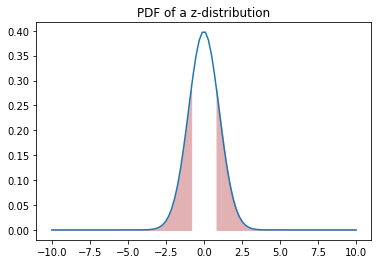

In [5]:
# The z-statistic follows z-distribution.
z_dist = stats.norm(0,1)
x = np.linspace(-10,10,100)
y = z_dist.pdf(x)
plt.plot(x,y)
plt.title("PDF of a z-distribution")

# Fill the area of the values to be 
# as extreme as or more extreme than the test statistic. (p-value)
right_interval = np.linspace(abs(z), x[-1], 50) 
left_interval = np.linspace(-x[-1], -abs(z), 50) 
plt.fill_between( right_interval, z_dist.pdf(right_interval) , color='#e1b1b4', alpha=1)
plt.fill_between( left_interval, z_dist.pdf(left_interval) , color='#e1b1b4', alpha=1)

In [6]:
# Calculate the p-value.
p, _ = integrate.quad(z_dist.pdf, left_interval[0], left_interval[-1]) #  Arg: function, from_value, to_value 
p *= 2 # two-tailed

print("The p-value for this test: {}".format(p))

The p-value for this test: 0.4046567619272863


In [7]:
# Conclusion (Significance level = 5%)
if p < 0.05:
  print("Reject H0: The two samples are not from the same population.")
else:
  print("Accept H0: The two samples are from the same population.")

Accept H0: The two samples are from the same population.


##### [Additional] You can calculate the p-value by the SF.

In [8]:
p = z_dist.sf( abs(z) ) * 2
print("p-value : {0}".format(p))

p-value : 0.40465676192728617


##### [Additional] You can use critical values.

In [9]:
cv = z_dist.ppf(.975)
print("Critical values (alpha = 0.05): -{0}, {0}".format(cv))

# If the test statistic is beyond the critical values, 
# we should reject the null hypothesis.

Critical values (alpha = 0.05): -1.959963984540054, 1.959963984540054


# (Step 4) Calculate the effect size

In [10]:
# The effect size for two-sample z-test is cohen's d.
# d = | sample_diff_mean - 0 | / pooled_std

d = abs(sample1_prop - sample2_prop) / np.sqrt(pooled_prop*(1-pooled_prop))

print("Effect size: {}".format(d))

Effect size: 0.0833333333333333
